In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pymc3 as pm
import scipy
%matplotlib inline

In [2]:
PATH = 'data/d.csv'

In [3]:
#　データを読み込む。 
csv = pd.read_csv(PATH)

In [4]:
csv

,plant.ID,y,alpha
0,1,0,-4.159582
1,2,0,-3.718362
2,3,0,-3.069020
3,4,0,-3.054211
4,5,0,-2.880656
5,6,2,-2.705595
6,7,1,-2.441703
7,8,1,-2.221327
8,9,0,-2.209120
9,10,1,-2.111941


In [5]:
# y列のデータを取り出す。
ys = csv['y'].values

In [6]:
# ヒストグラムを作る。
histo_ys = np.zeros(11)
for y in ys:
    histo_ys[y] += 1
print(histo_ys)
print(np.sum(histo_ys))

[  7.  10.  10.   5.  12.  11.  11.   7.  14.   9.   4.]
100.0


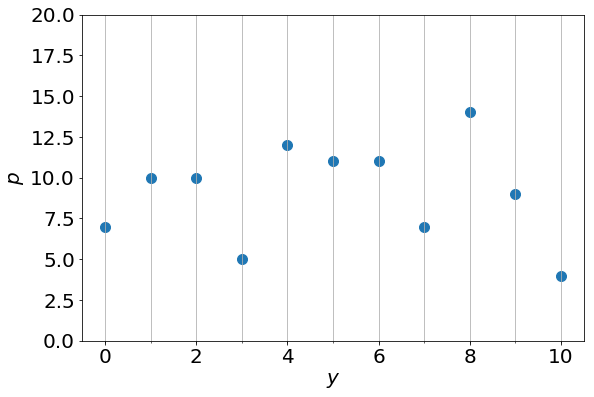

In [7]:
# ヒストグラムを描画する。
xs = np.arange(11)
plt.figure(figsize=(9,6))
plt.rcParams["font.size"] = 20
plt.scatter(xs, histo_ys, s=100)
plt.xlabel('$y$')
plt.ylabel('$p$')
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='minor')
plt.ylim(0, 20)
plt.show()

In [8]:
model = pm.Model()
with model:
    q = pm.Uniform('q', lower=0, upper=1)
    y = pm.Binomial('y', n=10, p=q, observed=ys)
    map_estimate = pm.find_MAP(model=model)
print(map_estimate['q'])

logp = -316.78, ||grad|| = 4: 100%|██████████| 5/5 [00:00<00:00, 58.89it/s]


0.4960000053023121


In [9]:
rv = scipy.stats.binom(10, map_estimate['q'])
binom_ys = [100 * rv.pmf(k) for k in range(11)]

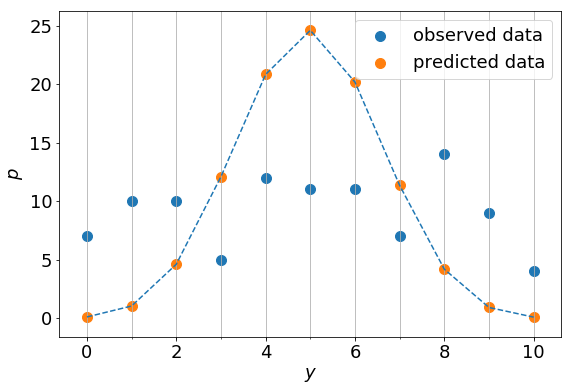

In [10]:
plt.figure(figsize=(9,6))
plt.rcParams["font.size"] = 18
plt.scatter(xs, histo_ys, s=100, label='observed data')
plt.plot(xs, binom_ys, ls='--')
plt.scatter(xs, binom_ys, s=100, label='predicted data')
plt.xlabel('$y$')
plt.ylabel('$p$')
plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='minor')
plt.legend(loc='best')
plt.show()

In [11]:
model = pm.Model()
with model:
    beta = pm.Normal('beta', mu=0, tau=1.0e-2)
    tau = pm.Gamma('tau', alpha=1.0e-02, beta=1.0e-02)
    alpha = pm.Normal('alpha', mu=0, tau=tau , shape=len(ys))
    ymu = pm.math.sigmoid(beta + alpha)
    y = pm.Binomial('y', n=10, p=ymu, observed=ys)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, start=start, step=step)
alpha.shape

logp = -48.984, ||grad|| = 0.031497: 100%|██████████| 33/33 [00:00<00:00, 1701.29it/s]  
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, tau, beta]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:24<00:00, 903.36draws/s] 


Shape.0

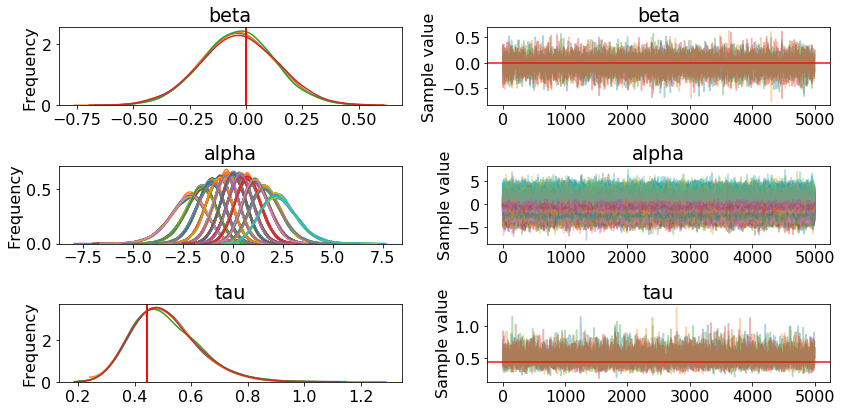

In [29]:
pm.traceplot(trace, lines={'beta': 0, 'tau': 1/(1.5**2)})
plt.figure(figsize=(10, 20))
plt.show()

In [32]:
pm.gelman_rubin(trace)

{'alpha': array([ 0.99996394,  0.99998426,  0.99994822,  0.99996086,  0.999956  ,
         1.00002244,  0.99997736,  0.9999659 ,  0.99999064,  1.00001467,
         1.00006342,  1.00022716,  0.99992477,  0.99994158,  0.99992239,
         1.00000959,  0.9999267 ,  0.9999312 ,  0.99991337,  0.99992286,
         1.00003023,  1.0000167 ,  0.99994718,  1.00003208,  0.99998639,
         0.99993152,  0.99996834,  1.00002064,  1.00011359,  1.00006114,
         0.99996043,  0.99997275,  0.9999275 ,  1.00036598,  0.99993289,
         1.00002072,  0.99993149,  0.99994869,  1.00021313,  0.9999735 ,
         1.00003205,  0.99992437,  1.00021588,  0.99996277,  0.99993375,
         1.00003172,  0.99997132,  1.00015588,  1.00007002,  1.00014033,
         1.00013271,  0.99994905,  0.99999957,  1.00000358,  1.00001619,
         1.00030792,  1.00004533,  0.99993419,  0.99996949,  0.9999538 ,
         0.99992494,  0.9999626 ,  0.9999865 ,  0.99998328,  0.99996419,
         0.9999641 ,  0.99990377,  0.99990

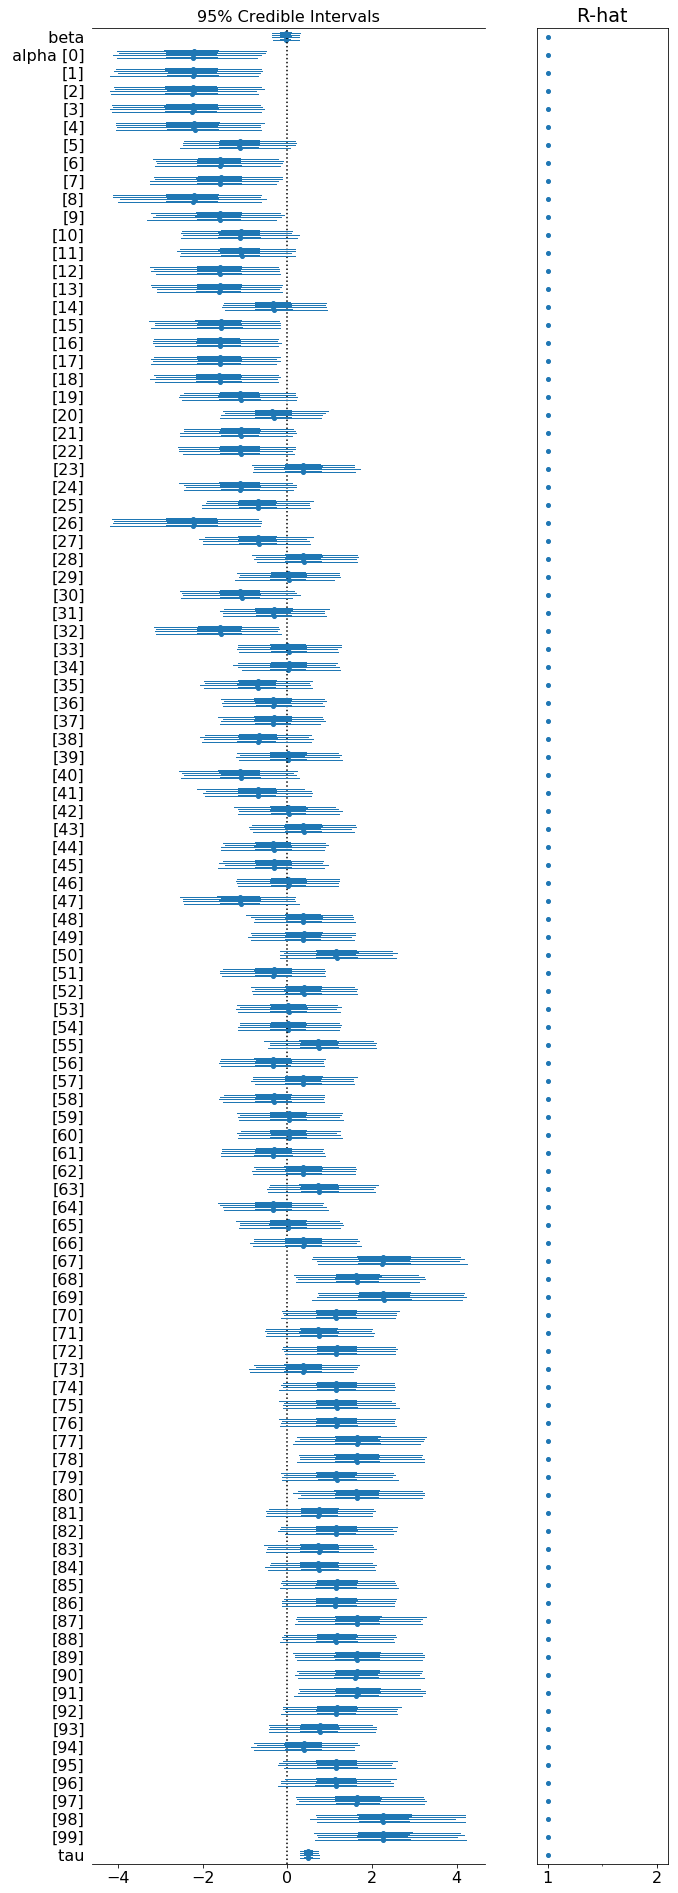

In [42]:
plt.figure(figsize=(10, 30))
pm.forestplot(trace)

In [43]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta,-0.032826,0.164322,0.001739,-0.351209,0.296180,9850.356209,1.000007
alpha__0,-2.288697,0.895462,0.006279,-4.062775,-0.609816,18390.276783,0.999964
alpha__1,-2.281847,0.893953,0.006204,-4.087924,-0.625773,18547.470653,0.999984
alpha__2,-2.296186,0.902143,0.007606,-4.099285,-0.609909,16444.831276,0.999948
alpha__3,-2.298598,0.918339,0.006922,-4.149863,-0.598588,18306.345899,0.999961
alpha__4,-2.273594,0.895513,0.005977,-4.053748,-0.620793,18106.849730,0.999956
alpha__5,-1.141409,0.679100,0.004805,-2.446733,0.198206,19575.962586,1.000022
alpha__6,-1.629920,0.759806,0.005536,-3.110177,-0.142122,18425.822368,0.999977
alpha__7,-1.629521,0.768635,0.005501,-3.204610,-0.191379,21278.943691,0.999966
alpha__8,-2.280669,0.901400,0.006043,-4.035915,-0.586386,19024.848890,0.999991


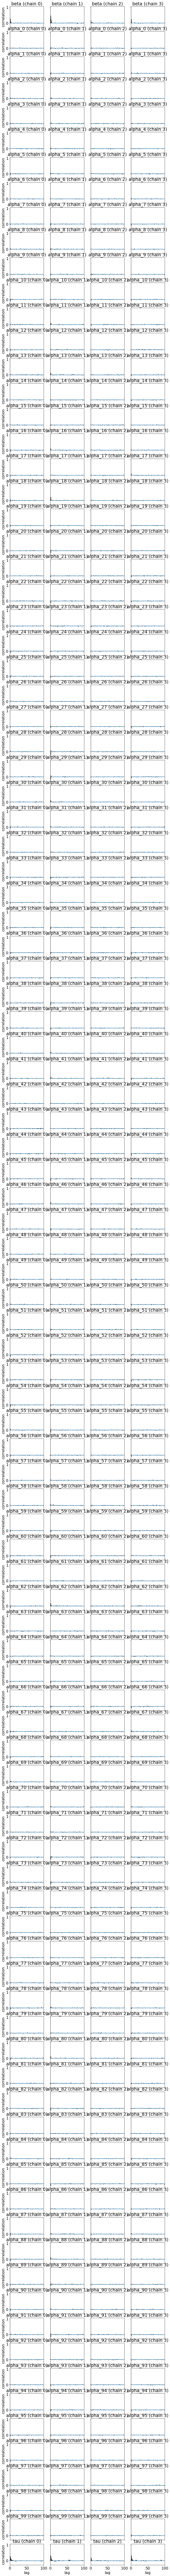

In [45]:
pm.autocorrplot(trace)
plt.show()

In [46]:
pm.effective_n(trace)

{'alpha': array([ 18390.27678325,  18547.47065331,  16444.83127562,  18306.34589889,
         18106.84972994,  19575.9625858 ,  18425.82236819,  21278.94369051,
         19024.84888957,  19775.49518534,  21786.12992796,  19229.13268805,
         20623.22023786,  17611.80228413,  20553.49425149,  19803.77117374,
         17408.64875006,  18107.5645142 ,  16553.22881801,  21346.89312771,
         21204.13143226,  21941.76070057,  22319.98887333,  20251.75526302,
         22787.11556995,  22167.30690187,  17087.56922781,  21541.96192651,
         20576.57894214,  21852.51553895,  19477.13359218,  20032.12009949,
         19701.40291924,  22138.45983696,  20697.27476619,  20551.39284347,
         21749.82987132,  21457.12787912,  21970.84277471,  20939.2465297 ,
         19156.06525379,  18941.41897175,  21984.94664562,  20508.26545565,
         21483.9987823 ,  20544.06380738,  19623.25709463,  20561.93550275,
         19417.88972967,  21064.05426931,  19303.12482464,  21834.38933554,
   

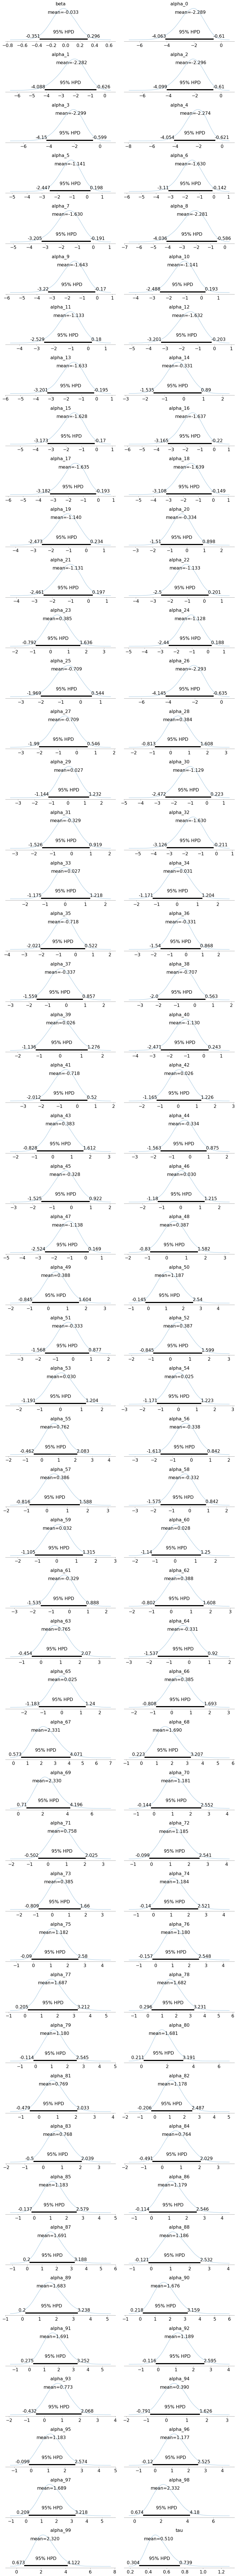

In [48]:
pm.plot_posterior(trace, kde_plot=True)
plt.show()

In [13]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [14]:
beta_samples = trace['beta'][:]
beta_samples = beta_samples.reshape(-1, 1)
alpha_samples = trace['alpha'][:]
q_samples = sigmoid(beta_samples + alpha_samples)

In [15]:
q_samples.shape

(20000, 100)

In [16]:
rows, cols = q_samples.shape
rows = 1000
y_samples = np.zeros((cols, 11))
for col in range(cols): 
    for row in range(rows):
        rv = scipy.stats.binom(10, q_samples[row, col])
        y_samples[col] += [rv.pmf(k) for k in range(11)]
    y_samples[col] /= rows
pred_y = np.sum(y_samples, axis=0)

In [17]:
pred_y.shape

(11,)

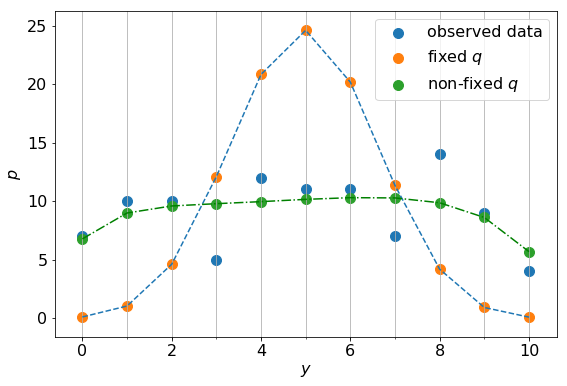

In [18]:
plt.figure(figsize=(9,6))
plt.rcParams['font.size'] = 16
plt.scatter(xs, histo_ys, s=100, label='observed data')

plt.plot(xs, binom_ys, ls='--')
plt.scatter(xs, binom_ys, s=100, label='fixed $q$')

plt.xlabel('$y$')
plt.ylabel('$p$')


plt.plot(xs, pred_y, ls='-.', c='g')
plt.scatter(xs, pred_y, s=100, label='non-fixed $q$')

plt.gca().xaxis.set_minor_locator(tick.MultipleLocator(1))
plt.grid(which='minor')
plt.legend(loc='best')
plt.show()

In [19]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta,-0.03,0.16,0.00,-0.35,0.30,9850.36,1.0
alpha__0,-2.29,0.90,0.01,-4.06,-0.61,18390.28,1.0
alpha__1,-2.28,0.89,0.01,-4.09,-0.63,18547.47,1.0
alpha__2,-2.30,0.90,0.01,-4.10,-0.61,16444.83,1.0
alpha__3,-2.30,0.92,0.01,-4.15,-0.60,18306.35,1.0
alpha__4,-2.27,0.90,0.01,-4.05,-0.62,18106.85,1.0
alpha__5,-1.14,0.68,0.00,-2.45,0.20,19575.96,1.0
alpha__6,-1.63,0.76,0.01,-3.11,-0.14,18425.82,1.0
alpha__7,-1.63,0.77,0.01,-3.20,-0.19,21278.94,1.0
alpha__8,-2.28,0.90,0.01,-4.04,-0.59,19024.85,1.0
